In [58]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
#import pyvis
from pyvis.network import Network 

import math as math
import seaborn as sns
%matplotlib notebook
from ipywidgets import *

from sklearn.linear_model import LinearRegression

In [4]:
G = nx.read_gml('lesmis.gml')

In [5]:
#nx.draw(G, with_labels=True)
net = Network(notebook=True)
net.from_nx(G)
net.show('example.html')

In [6]:
print(nx.info(G))
n= len(nx.nodes(G))
n

Graph with 77 nodes and 254 edges


77

In [7]:
nx.is_connected(G)

True

In [8]:
nx.is_weighted(G)

True

In [9]:
nx.number_connected_components(G)

1

In [10]:
list(nx.connected_components(G))

[{'Anzelma',
  'Babet',
  'Bahorel',
  'Bamatabois',
  'BaronessT',
  'Blacheville',
  'Bossuet',
  'Boulatruelle',
  'Brevet',
  'Brujon',
  'Champmathieu',
  'Champtercier',
  'Chenildieu',
  'Child1',
  'Child2',
  'Claquesous',
  'Cochepaille',
  'Combeferre',
  'Cosette',
  'Count',
  'CountessDeLo',
  'Courfeyrac',
  'Cravatte',
  'Dahlia',
  'Enjolras',
  'Eponine',
  'Fameuil',
  'Fantine',
  'Fauchelevent',
  'Favourite',
  'Feuilly',
  'Gavroche',
  'Geborand',
  'Gervais',
  'Gillenormand',
  'Grantaire',
  'Gribier',
  'Gueulemer',
  'Isabeau',
  'Javert',
  'Joly',
  'Jondrette',
  'Judge',
  'Labarre',
  'Listolier',
  'LtGillenormand',
  'Mabeuf',
  'Magnon',
  'Marguerite',
  'Marius',
  'MlleBaptistine',
  'MlleGillenormand',
  'MlleVaubois',
  'MmeBurgon',
  'MmeDeR',
  'MmeHucheloup',
  'MmeMagloire',
  'MmePontmercy',
  'MmeThenardier',
  'Montparnasse',
  'MotherInnocent',
  'MotherPlutarch',
  'Myriel',
  'Napoleon',
  'OldMan',
  'Perpetue',
  'Pontmercy',
  'Pro

In [11]:
d = dict(nx.degree(G))
seq = sorted(d.values())

<IPython.core.display.Javascript object>


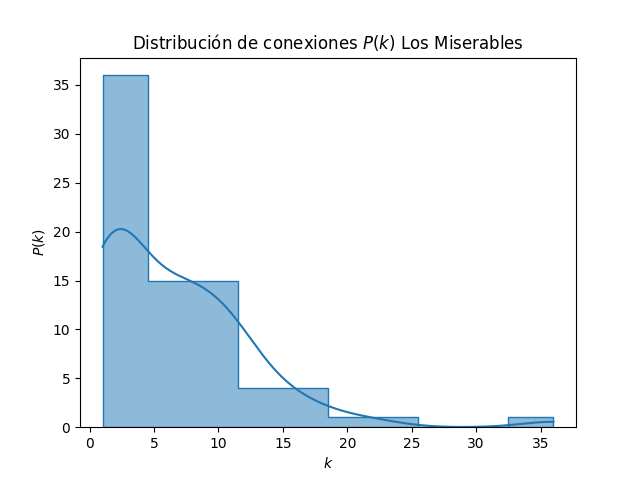

<AxesSubplot:title={'center':'Distribución de conexiones $P(k)$ Los Miserables'}, xlabel='$k$', ylabel='$P(k)$'>

In [20]:
plt.title("Distribución de conexiones $P(k)$ Los Miserables")
plt.xlabel('$k$')
plt.ylabel('$P(k)$')
sns.histplot(seq,stat='count',kde=True, fill= True, element='step') 

In [13]:
# k promedio
kavg = sum(d.values())/len(d)
kavg

6.597402597402597

In [14]:
# Clustering coefficient
Cavg = nx.average_clustering(G)
Cavg

0.5731367499320134

In [15]:
# Avg Shortest Path
spl = nx.average_shortest_path_length(G)
spl

2.6411483253588517

### ¿Es una red Erdos-Renyi? No

Una red erdos renyi se caracteriza por una distribución de poisson, donde existen dos caracteristicas distintivas:

$<l> \thicksim \frac{log(n)}{log(<k>)}$ y

$ <C> = \frac{<k>}{n}  $, $<C> = \frac{p(n-1)}{n}$, $<C> \thicksim p$

In [16]:
l = math.log(n)/math.log(kavg)
l

2.302358943785772

### ¿Es una red de mundo pequeño? No

Una red de mundo pequeño

$<l> \thicksim ln(N)$

In [17]:
lsw = math.log(n)
lsw

4.343805421853684

### ¿Es una red libre de escala?

<IPython.core.display.Javascript object>


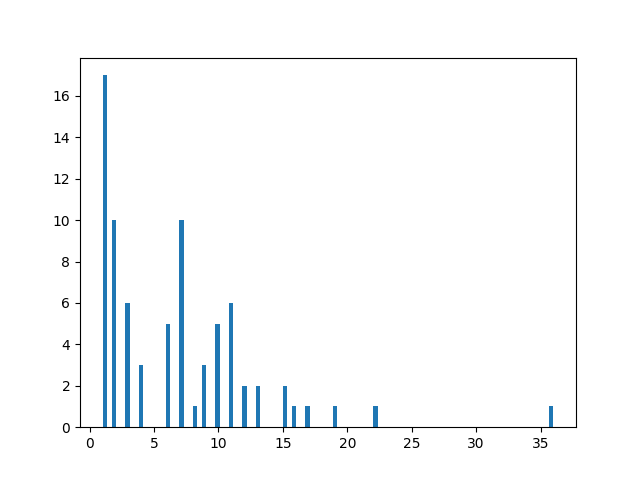

In [37]:
histBA = plt.hist(seq, bins=100)
histBA
K=[]


In [50]:
len(histBA[1])

101

<IPython.core.display.Javascript object>


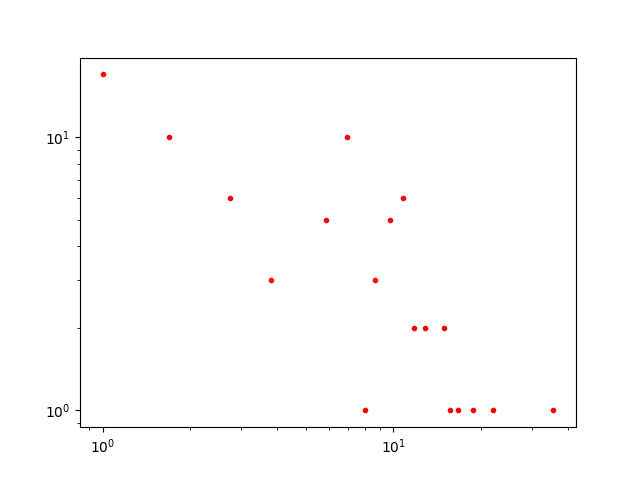

In [39]:
for i in range(len(histBA[1])-1):
    K.append(histBA[1][i])

plt.loglog(K, histBA[0], 'r.', label='$< k > =$ %f \n $< C > =$ %f \n $ < l > =$ %f' % (kavg,Cavg,spl))

<IPython.core.display.Javascript object>


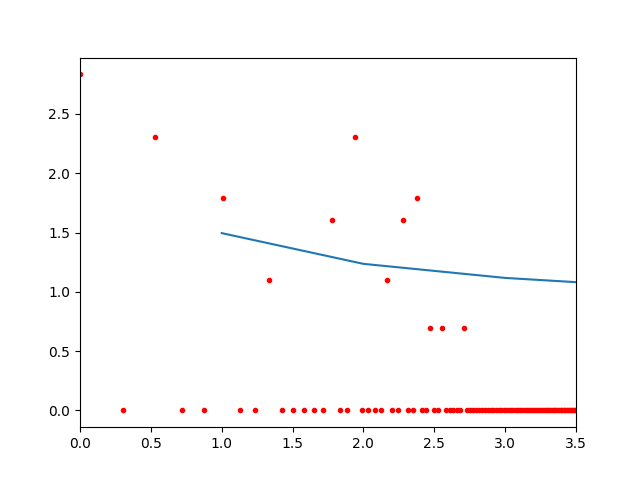

[-0.33402583  1.07625687]


/tmp/ipykernel_35806/3590022984.py:13: RuntimeWarning: divide by zero encountered in power
  plt.plot(x**coef[0]);


(0.0, 3.5)

In [83]:

x = np.log(K)
y = np.log(histBA[0], out=np.zeros_like(histBA[0]), where=(histBA[0]!=0))


coef = np.polyfit(x,y,1)
poly1d_fn = np.poly1d(coef) 



#plt.plot(x, poly1d_fn(x), '--k', label='m = %f, \n b = %f' % (coef[0],coef[1]))
plt.plot(x,y, 'r.') 
print(coef)
plt.plot(x**coef[0]);

plt.xlim([0, 3.5])

In [75]:
x

array([0.        , 0.30010459, 0.53062825, 0.71783979, 0.87546874,
       1.01160091, 1.13140211, 1.23837423, 1.33500107, 1.42310833,
       1.5040774 , 1.5789787 , 1.64865863, 1.71379793, 1.77495235,
       1.83258146, 1.88706965, 1.93874166, 1.98787435, 2.03470565,
       2.07944154, 2.12226154, 2.16332303, 2.20276476, 2.24070969,
       2.27726729, 2.31253542, 2.34660198, 2.37954613, 2.4114395 ,
       2.44234704, 2.47232787, 2.50143595, 2.52972067, 2.55722731,
       2.58399755, 2.61006979, 2.63547951, 2.66025954, 2.68444034,
       2.7080502 , 2.73111547, 2.75366071, 2.77570885, 2.79728133,
       2.81839826, 2.83907846, 2.85933965, 2.87919846, 2.89867056,
       2.91777073, 2.93651291, 2.95491028, 2.97297529, 2.99071973,
       3.00815479, 3.02529108, 3.04213865, 3.05870707, 3.07500545,
       3.09104245, 3.10682632, 3.12236492, 3.13766577, 3.15273602,
       3.16758253, 3.18221184, 3.19663022, 3.21084365, 3.2248579 ,
       3.23867845, 3.2523106 , 3.26575941, 3.27902975, 3.29212

### Modularidad

In [84]:
import networkx.algorithms.community as nx_comm

In [87]:
nx_comm.label_propagation_communities(G)

dict_values([{'Champtercier', 'Geborand', 'OldMan', 'CountessDeLo', 'Myriel', 'Count', 'Cravatte', 'Napoleon'}, {'Marguerite', 'Champmathieu', 'Valjean', 'Chenildieu', 'MotherInnocent', 'Javert', 'MmeMagloire', 'Toussaint', 'MmeDeR', 'Labarre', 'Brevet', 'Isabeau', 'Simplice', 'Gervais', 'Scaufflaire', 'Judge', 'Gribier', 'Perpetue', 'Woman2', 'Fauchelevent', 'Bamatabois', 'Woman1', 'Cochepaille', 'MlleBaptistine'}, {'Gillenormand', 'MlleVaubois', 'MmePontmercy', 'Dahlia', 'Listolier', 'LtGillenormand', 'Fantine', 'Tholomyes', 'Blacheville', 'Favourite', 'Zephine', 'MlleGillenormand', 'BaronessT', 'Pontmercy', 'Cosette', 'Fameuil'}, {'Boulatruelle', 'Montparnasse', 'Magnon', 'Babet', 'MmeThenardier', 'Thenardier', 'Gueulemer', 'Anzelma', 'Claquesous', 'Eponine', 'Brujon'}, {'MmeBurgon', 'Jondrette'}, {'Marius', 'Mabeuf', 'Grantaire', 'Bossuet', 'MotherPlutarch', 'MmeHucheloup', 'Bahorel', 'Enjolras', 'Courfeyrac', 'Feuilly', 'Prouvaire', 'Gavroche', 'Combeferre', 'Joly'}, {'Child2', 'C

In [90]:
m = nx_comm.girvan_newman(G)

In [91]:
for i in m:
    Q = nx_comm.modularity(G,i)
    print(i)
    print(Q)

({'OldMan', 'Champtercier', 'Geborand', 'CountessDeLo', 'Myriel', 'Count', 'Cravatte', 'Napoleon', 'MmeMagloire', 'MlleBaptistine'}, {'Montparnasse', 'Marguerite', 'Mabeuf', 'MlleVaubois', 'Grantaire', 'Bossuet', 'MmeHucheloup', 'Champmathieu', 'Courfeyrac', 'Valjean', 'Zephine', 'Chenildieu', 'Brujon', 'Prouvaire', 'Gavroche', 'Combeferre', 'Joly', 'MotherInnocent', 'Fantine', 'Marius', 'Enjolras', 'Gueulemer', 'Blacheville', 'Favourite', 'Anzelma', 'Claquesous', 'MotherPlutarch', 'Javert', 'MlleGillenormand', 'Pontmercy', 'BaronessT', 'Cosette', 'Fameuil', 'Gillenormand', 'Toussaint', 'MmeDeR', 'Listolier', 'Labarre', 'Brevet', 'Isabeau', 'Feuilly', 'Tholomyes', 'Simplice', 'Child2', 'Gervais', 'Scaufflaire', 'Judge', 'Boulatruelle', 'Child1', 'MmePontmercy', 'Jondrette', 'Magnon', 'Dahlia', 'Babet', 'MmeThenardier', 'LtGillenormand', 'Thenardier', 'Woman2', 'Bahorel', 'MmeBurgon', 'Fauchelevent', 'Bamatabois', 'Perpetue', 'Gribier', 'Eponine', 'Woman1', 'Cochepaille'})
0.07464039928

({'OldMan', 'Geborand', 'Champtercier', 'Count', 'Myriel', 'Cravatte', 'MmeMagloire', 'MlleBaptistine'}, {'Napoleon'}, {'CountessDeLo'}, {'Labarre'}, {'Champmathieu', 'Brevet', 'Valjean', 'Bamatabois', 'Chenildieu', 'Judge', 'Woman1', 'Cochepaille'}, {'Marguerite'}, {'MmeDeR'}, {'Isabeau'}, {'Gervais'}, {'Dahlia', 'Listolier', 'Perpetue', 'Tholomyes', 'Blacheville', 'Favourite', 'Zephine', 'Fameuil', 'Fantine'}, {'Montparnasse', 'Babet', 'MmeThenardier', 'Thenardier', 'Gueulemer', 'Anzelma', 'Claquesous', 'Eponine', 'Javert', 'Brujon'}, {'Toussaint', 'MlleVaubois', 'MmePontmercy', 'LtGillenormand', 'MlleGillenormand', 'Cosette'}, {'Fauchelevent', 'Gribier', 'MotherInnocent'}, {'Simplice'}, {'Scaufflaire'}, {'Pontmercy'}, {'Boulatruelle'}, {'Woman2'}, {'MmeBurgon', 'Jondrette'}, {'Marius', 'Mabeuf', 'Grantaire', 'Bossuet', 'MmeHucheloup', 'Bahorel', 'Enjolras', 'Courfeyrac', 'Feuilly', 'Prouvaire', 'Gavroche', 'Combeferre', 'Joly'}, {'Gillenormand', 'BaronessT', 'Magnon'}, {'MotherPluta

({'MmeMagloire', 'Myriel', 'MlleBaptistine'}, {'Napoleon'}, {'CountessDeLo'}, {'Geborand'}, {'Champtercier'}, {'Cravatte'}, {'Count'}, {'OldMan'}, {'Labarre'}, {'Champmathieu', 'Brevet', 'Valjean', 'Bamatabois', 'Chenildieu', 'Judge', 'Cochepaille'}, {'Marguerite'}, {'MmeDeR'}, {'Isabeau'}, {'Gervais'}, {'Dahlia', 'Listolier', 'Tholomyes', 'Blacheville', 'Favourite', 'Zephine', 'Fameuil', 'Fantine'}, {'MmeThenardier'}, {'Montparnasse', 'Babet', 'Thenardier', 'Gueulemer', 'Claquesous', 'Eponine', 'Brujon'}, {'Toussaint', 'Cosette'}, {'Javert'}, {'Fauchelevent', 'Gribier'}, {'Perpetue'}, {'Simplice'}, {'Scaufflaire'}, {'Woman1'}, {'Pontmercy'}, {'Boulatruelle'}, {'Anzelma'}, {'Woman2'}, {'MotherInnocent'}, {'MmeBurgon', 'Jondrette'}, {'Mabeuf', 'Grantaire', 'Bossuet', 'Bahorel', 'Enjolras', 'Courfeyrac', 'Feuilly', 'Prouvaire', 'Gavroche', 'Combeferre', 'Joly'}, {'Gillenormand', 'BaronessT'}, {'Magnon'}, {'MlleVaubois', 'MlleGillenormand'}, {'MmePontmercy'}, {'LtGillenormand'}, {'Marius'

({'Myriel'}, {'Napoleon'}, {'MlleBaptistine'}, {'MmeMagloire'}, {'CountessDeLo'}, {'Geborand'}, {'Champtercier'}, {'Cravatte'}, {'Count'}, {'OldMan'}, {'Labarre'}, {'Valjean'}, {'Marguerite'}, {'MmeDeR'}, {'Isabeau'}, {'Gervais'}, {'Tholomyes'}, {'Listolier'}, {'Fameuil'}, {'Blacheville'}, {'Favourite'}, {'Dahlia'}, {'Zephine'}, {'Fantine'}, {'MmeThenardier'}, {'Thenardier'}, {'Cosette'}, {'Javert'}, {'Fauchelevent'}, {'Champmathieu', 'Brevet', 'Bamatabois', 'Chenildieu', 'Judge', 'Cochepaille'}, {'Perpetue'}, {'Simplice'}, {'Scaufflaire'}, {'Woman1'}, {'Pontmercy'}, {'Boulatruelle'}, {'Montparnasse', 'Babet', 'Gueulemer', 'Claquesous', 'Eponine', 'Brujon'}, {'Anzelma'}, {'Woman2'}, {'MotherInnocent'}, {'Gribier'}, {'MmeBurgon', 'Jondrette'}, {'Grantaire', 'Bossuet', 'Bahorel', 'Enjolras', 'Courfeyrac', 'Feuilly', 'Prouvaire', 'Gavroche', 'Combeferre', 'Joly'}, {'Gillenormand', 'BaronessT'}, {'Magnon'}, {'MlleVaubois', 'MlleGillenormand'}, {'MmePontmercy'}, {'LtGillenormand'}, {'Marius

({'Myriel'}, {'Napoleon'}, {'MlleBaptistine'}, {'MmeMagloire'}, {'CountessDeLo'}, {'Geborand'}, {'Champtercier'}, {'Cravatte'}, {'Count'}, {'OldMan'}, {'Labarre'}, {'Valjean'}, {'Marguerite'}, {'MmeDeR'}, {'Isabeau'}, {'Gervais'}, {'Tholomyes'}, {'Listolier'}, {'Fameuil'}, {'Blacheville'}, {'Favourite'}, {'Dahlia'}, {'Zephine'}, {'Fantine'}, {'MmeThenardier'}, {'Thenardier'}, {'Cosette'}, {'Javert'}, {'Fauchelevent'}, {'Bamatabois'}, {'Perpetue'}, {'Simplice'}, {'Scaufflaire'}, {'Woman1'}, {'Judge'}, {'Champmathieu'}, {'Brevet'}, {'Chenildieu'}, {'Cochepaille'}, {'Pontmercy'}, {'Boulatruelle'}, {'Eponine'}, {'Anzelma'}, {'Woman2'}, {'MotherInnocent'}, {'Gribier'}, {'Jondrette'}, {'MmeBurgon'}, {'Gavroche'}, {'Gillenormand'}, {'Magnon'}, {'MlleGillenormand'}, {'MmePontmercy'}, {'MlleVaubois'}, {'LtGillenormand'}, {'Marius'}, {'BaronessT'}, {'Mabeuf'}, {'Enjolras'}, {'Combeferre'}, {'Prouvaire'}, {'Feuilly'}, {'Grantaire', 'Bossuet', 'Bahorel', 'Courfeyrac', 'Joly'}, {'MotherPlutarch'}, 